#üìå Extracci√≥n

In [142]:
import pandas as pd

try:
    datos = pd.read_json('https://raw.githubusercontent.com/Fernando-Falla/Challenge_TelecomX_Parte1/refs/heads/main/TelecomX_Data.json')
    display(datos.head())
except FileNotFoundError:
    print("The file was not downloaded correctly. Please check the GitHub URL.")

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [143]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [144]:
datos.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [145]:
# normalizamos la columna 'customer'
customer_normalized = pd.json_normalize(datos['customer'], sep='_')
display(customer_normalized.head())


gender  SeniorCitizen Partner Dependents  tenure
0  Female              0     Yes        Yes       9
1    Male              0      No         No       9
2    Male              0      No         No       4
3    Male              1     Yes         No      13
4  Female              1     Yes         No       3

In [146]:
# normalizamos la columna 'phone'
phone_normalized = pd.json_normalize(datos['phone'], sep='_')
display(phone_normalized.head())

PhoneService MultipleLines
0          Yes            No
1          Yes           Yes
2          Yes            No
3          Yes            No
4          Yes            No

In [147]:
# normalizamos la columna 'internet'
internet_normalized = pd.json_normalize(datos['internet'], sep='_')
display(internet_normalized.head())

InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No         Yes   
1             DSL             No           No               No          No   
2     Fiber optic             No           No              Yes          No   
3     Fiber optic             No          Yes              Yes          No   
4     Fiber optic             No           No               No         Yes   

  StreamingTV StreamingMovies  
0         Yes              No  
1          No             Yes  
2          No              No  
3         Yes             Yes  
4         Yes              No

In [148]:
# normalizamos la columna 'account'
account_normalized = pd.json_normalize(datos['account'], sep='_')
display(account_normalized.head())

Contract PaperlessBilling     PaymentMethod  Charges_Monthly  \
0        One year              Yes      Mailed check             65.6   
1  Month-to-month               No      Mailed check             59.9   
2  Month-to-month              Yes  Electronic check             73.9   
3  Month-to-month              Yes  Electronic check             98.0   
4  Month-to-month              Yes      Mailed check             83.9   

  Charges_Total  
0         593.3  
1         542.4  
2        280.85  
3       1237.85  
4         267.4

#üîß Transformaci√≥n

In [149]:
# Combinar los DFrames normalizados con el DFrame original
datos_normalized = pd.concat([datos[['customerID', 'Churn']],
                              customer_normalized,
                              phone_normalized,
                              internet_normalized,
                              account_normalized], axis=1)

display(datos_normalized.head())

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges_Monthly  Charges_Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [150]:
# Contar los valores faltantes en la columna 'Churn'
missing_churn_count = datos_normalized['Churn'].isnull().sum()
print(f"N√∫mero de valores faltantes en la columna 'Churn': {missing_churn_count}")

N√∫mero de valores faltantes en la columna 'Churn': 0


In [151]:
#Vamos a reemplazar las cadenas vac√≠as en la columna 'Churn' por el valor 'No'.
import numpy as np

datos_normalized['Churn'] = datos_normalized['Churn'].replace('', 'No')

# Verificar los valores √∫nicos en la columna 'Churn' despu√©s del reemplazo
print("Valores √∫nicos en la columna 'Churn' despu√©s de manejar las cadenas vac√≠as:")
print(datos_normalized['Churn'].unique())

Valores √∫nicos en la columna 'Churn' despu√©s de manejar las cadenas vac√≠as:
['No' 'Yes']


In [152]:
# Verificar valores ausentes
print("Valores ausentes por columna:")
print(datos_normalized.isnull().sum())

# Verificar filas duplicadas
print("\nN√∫mero de filas duplicadas:")
print(datos_normalized.duplicated().sum())

# Verificar inconsistencias en columnas categ√≥ricas (ejemplo con algunas columnas)
# Se podr√≠an agregar m√°s columnas categ√≥ricas a esta lista seg√∫n sea necesario
categorical_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

print("\nValores √∫nicos en columnas categ√≥ricas:")
for col in categorical_cols:
    if col in datos_normalized.columns:
        print(f"- {col}: {datos_normalized[col].unique()}")
    else:
        print(f"- Columna '{col}' no encontrada en el DataFrame.")

# Nota: Para errores de formato en columnas num√©ricas como 'Charges_Total' y 'Charges_Monthly',
# se verificar√°n m√°s adelante durante la conversi√≥n de tipos de datos si es necesario.

Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64

N√∫mero de filas duplicadas:
0

Valores √∫nicos en columnas categ√≥ricas:
- Churn: ['No' 'Yes']
- gender: ['Female' 'Male']
- Partner: ['Yes' 'No']
- Dependents: ['Yes' 'No']
- PhoneService: ['Yes' 'No']
- MultipleLines: ['No' 'Yes' 'No phone service']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet service']
- DeviceProtection: ['No' 'Yes' 'No internet service']
- TechSupport: ['Yes' 'No' 'No inter

In [153]:
# Vamos a convertir las columnas a los tipos de datos apropiados.
# Crear una copia del DataFrame para evitar SettingWithCopyWarning
datos_cleaned = datos_normalized.copy()

# Convertir columnas de cargos a num√©ricas, manejando posibles errores
datos_cleaned['Charges_Monthly'] = pd.to_numeric(datos_cleaned['Charges_Monthly'], errors='coerce')
datos_cleaned['Charges_Total'] = pd.to_numeric(datos_cleaned['Charges_Total'], errors='coerce')

# Verificar si hay valores NaN introducidos por la conversi√≥n
print("Valores NaN despu√©s de la conversi√≥n de columnas de cargos:")
print(datos_cleaned[['Charges_Monthly', 'Charges_Total']].isnull().sum())

# Convertir columnas categ√≥ricas a tipo 'category'
categorical_cols = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    if col in datos_cleaned.columns:
        datos_cleaned[col] = datos_cleaned[col].astype('category')

# Verificar los tipos de datos despu√©s de la conversi√≥n
print("\nTipos de datos despu√©s de la conversi√≥n:")
print(datos_cleaned.dtypes)

Valores NaN despu√©s de la conversi√≥n de columnas de cargos:
Charges_Monthly     0
Charges_Total      11
dtype: int64

Tipos de datos despu√©s de la conversi√≥n:
customerID            object
Churn               category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Charges_Monthly      float64
Charges_Total        float64
dtype: object


In [154]:
datos_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   category
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [155]:
# Aplicamos one-hot encoding a las columnas categ√≥ricas 'InternetService', '
#Contract' y 'PaymentMethod' para convertirlas en columnas num√©ricas
# Aplicar one-hot encoding a las columnas especificadas
datos_encoded = pd.get_dummies(datos_cleaned, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

# Mostrar las primeras filas del DataFrame con las nuevas columnas dummy
display(datos_encoded.head())

# Verificar las nuevas columnas y sus tipos de datos
print("\nColumnas despu√©s del one-hot encoding:")
print(datos_encoded.columns)
print("\nTipos de datos despu√©s del one-hot encoding:")
print(datos_encoded.dtypes)

customerID Churn  gender SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female             0     Yes        Yes       9   
1  0003-MKNFE    No    Male             0      No         No       9   
2  0004-TLHLJ   Yes    Male             0      No         No       4   
3  0011-IGKFF   Yes    Male             1     Yes         No      13   
4  0013-EXCHZ   Yes  Female             1     Yes         No       3   

  PhoneService MultipleLines OnlineSecurity  ... InternetService_DSL  \
0          Yes            No             No  ...                   1   
1          Yes           Yes             No  ...                   1   
2          Yes            No             No  ...                   0   
3          Yes            No             No  ...                   0   
4          Yes            No             No  ...                   0   

  InternetService_Fiber optic InternetService_No Contract_Month-to-month  \
0                           0                  0                       0   
1                           0                  0                       1   
2                           1                  0                       1   
3                           1                  0                       1   
4                           1                  0                       1   

  Contract_One year Contract_Two year  \
0                 1                 0   
1                 0                 0   
2                 0                 0   
3                 0                 0   
4                 0                 0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               1   
3                                      0                               1   
4                                      0                               0   

   PaymentMethod_Mailed check  
0                           1  
1                           1  
2                           0  
3                           0  
4                           1  

[5 rows x 28 columns]


Columnas despu√©s del one-hot encoding:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Charges_Monthly',
       'Charges_Total', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Tipos de datos despu√©s del one-hot encoding:
customerID                                   object
Churn                                      category
gender                                     category
SeniorCitizen                              category
Partner                                    categ

In [156]:
# convertiremos las columnas booleanas a tipo entero (1 para True, 0 para False).
# Primero, identificaremos las columnas booleanas.
# Identificar columnas booleanas
boolean_cols = datos_encoded.select_dtypes(include='bool').columns

# Convertir columnas booleanas a entero (1/0)
for col in boolean_cols:
    datos_encoded[col] = datos_encoded[col].astype(int)

# Verificar los tipos de datos despu√©s de la conversi√≥n
print("\nTipos de datos despu√©s de convertir booleanos a enteros:")
print(datos_encoded.dtypes)


Tipos de datos despu√©s de convertir booleanos a enteros:
customerID                                   object
Churn                                      category
gender                                     category
SeniorCitizen                              category
Partner                                    category
Dependents                                 category
tenure                                        int64
PhoneService                               category
MultipleLines                              category
OnlineSecurity                             category
OnlineBackup                               category
DeviceProtection                           category
TechSupport                                category
StreamingTV                                category
StreamingMovies                            category
PaperlessBilling                           category
Charges_Monthly                             float64
Charges_Total                               float64
Inter

In [157]:
datos_encoded.head()

customerID Churn  gender SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female             0     Yes        Yes       9   
1  0003-MKNFE    No    Male             0      No         No       9   
2  0004-TLHLJ   Yes    Male             0      No         No       4   
3  0011-IGKFF   Yes    Male             1     Yes         No      13   
4  0013-EXCHZ   Yes  Female             1     Yes         No       3   

  PhoneService MultipleLines OnlineSecurity  ... InternetService_DSL  \
0          Yes            No             No  ...                   1   
1          Yes           Yes             No  ...                   1   
2          Yes            No             No  ...                   0   
3          Yes            No             No  ...                   0   
4          Yes            No             No  ...                   0   

  InternetService_Fiber optic InternetService_No Contract_Month-to-month  \
0                           0                  0                       0   
1                           0                  0                       1   
2                           1                  0                       1   
3                           1                  0                       1   
4                           1                  0                       1   

  Contract_One year Contract_Two year  \
0                 1                 0   
1                 0                 0   
2                 0                 0   
3                 0                 0   
4                 0                 0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               1   
3                                      0                               1   
4                                      0                               0   

   PaymentMethod_Mailed check  
0                           1  
1                           1  
2                           0  
3                           0  
4                           1  

[5 rows x 28 columns]

In [158]:
# Se eliminan las columnas con datos no significativos.
datos_encoded = datos_encoded.drop(['customerID', 'InternetService_No'], axis = 1)
datos_encoded.columns.tolist()

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [159]:
# cambiar los nombres de las columnas, al espa√±ol
#para que el estudio sea m√°s entendible

col_equivalencias = {
    'Churn': 'Abandono',
    'gender': 'G√©nero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'PermanenciaMeses',
    'PhoneService': 'ServicioTel√©fono',
    'MultipleLines': 'L√≠neasM√∫ltiples',
    'OnlineSecurity': 'SeguridadEnL√≠nea',
    'OnlineBackup': 'RespaldoEnL√≠nea',
    'DeviceProtection': 'Protecci√≥nDispositivo',
    'TechSupport': 'SoporteT√©cnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPel√≠culas',
    'PaperlessBilling': 'Facturaci√≥nElectr√≥nica',
    'Charges_Monthly': 'CargoMensual',
    'Charges_Total': 'CargoTotal',
    'InternetService_DSL': 'Internet_DSL',
    'InternetService_Fiber optic': 'Internet_Fibra√ìptica',
    'Contract_Month-to-month': 'Contrato_Mensual',
    'Contract_One year': 'Contrato_1A√±o',
    'Contract_Two year': 'Contrato_2A√±os',
    'PaymentMethod_Bank transfer (automatic)': 'Pago_TransferenciaAutom√°tica',
    'PaymentMethod_Credit card (automatic)': 'Pago_TarjetaAutom√°tica',
    'PaymentMethod_Electronic check': 'Pago_ChequeElectr√≥nico',
    'PaymentMethod_Mailed check': 'Pago_ChequeCorreo'
}
datos_encoded = datos_encoded.rename(columns=col_equivalencias)
datos_encoded.columns.tolist()

['Abandono',
 'G√©nero',
 'AdultoMayor',
 'Pareja',
 'Dependientes',
 'PermanenciaMeses',
 'ServicioTel√©fono',
 'L√≠neasM√∫ltiples',
 'SeguridadEnL√≠nea',
 'RespaldoEnL√≠nea',
 'Protecci√≥nDispositivo',
 'SoporteT√©cnico',
 'StreamingTV',
 'StreamingPel√≠culas',
 'Facturaci√≥nElectr√≥nica',
 'CargoMensual',
 'CargoTotal',
 'Internet_DSL',
 'Internet_Fibra√ìptica',
 'Contrato_Mensual',
 'Contrato_1A√±o',
 'Contrato_2A√±os',
 'Pago_TransferenciaAutom√°tica',
 'Pago_TarjetaAutom√°tica',
 'Pago_ChequeElectr√≥nico',
 'Pago_ChequeCorreo']

In [160]:
datos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Abandono                      7267 non-null   category
 1   G√©nero                        7267 non-null   category
 2   AdultoMayor                   7267 non-null   category
 3   Pareja                        7267 non-null   category
 4   Dependientes                  7267 non-null   category
 5   PermanenciaMeses              7267 non-null   int64   
 6   ServicioTel√©fono              7267 non-null   category
 7   L√≠neasM√∫ltiples               7267 non-null   category
 8   SeguridadEnL√≠nea              7267 non-null   category
 9   RespaldoEnL√≠nea               7267 non-null   category
 10  Protecci√≥nDispositivo         7267 non-null   category
 11  SoporteT√©cnico                7267 non-null   category
 12  StreamingTV                   7267 non-n

In [161]:
datos_encoded.head()

Abandono  G√©nero AdultoMayor Pareja Dependientes  PermanenciaMeses  \
0       No  Female           0    Yes          Yes                 9   
1       No    Male           0     No           No                 9   
2      Yes    Male           0     No           No                 4   
3      Yes    Male           1    Yes           No                13   
4      Yes  Female           1    Yes           No                 3   

  ServicioTel√©fono L√≠neasM√∫ltiples SeguridadEnL√≠nea RespaldoEnL√≠nea  ...  \
0              Yes              No               No             Yes  ...   
1              Yes             Yes               No              No  ...   
2              Yes              No               No              No  ...   
3              Yes              No               No             Yes  ...   
4              Yes              No               No              No  ...   

  CargoTotal Internet_DSL Internet_Fibra√ìptica Contrato_Mensual Contrato_1A√±o  \
0     593.30            1                    0                0             1   
1     542.40            1                    0                1             0   
2     280.85            0                    1                1             0   
3    1237.85            0                    1                1             0   
4     267.40            0                    1                1             0   

   Contrato_2A√±os  Pago_TransferenciaAutom√°tica  Pago_TarjetaAutom√°tica  \
0               0                             0                       0   
1               0                             0                       0   
2               0                             0                       0   
3               0                             0                       0   
4               0                             0                       0   

   Pago_ChequeElectr√≥nico  Pago_ChequeCorreo  
0                       0                  1  
1                       0                  1  
2                       1                  0  
3                       1                  0  
4                       0                  1  

[5 rows x 26 columns]

In [162]:
# Manejar valores faltantes en 'CargoTotal'
# Imputaremos los valores faltantes con la mediana, una estrategia com√∫n para datos num√©ricos con posibles valores at√≠picos.
median_cargo_total = datos_encoded['CargoTotal'].median()

# Imputar valores faltantes asignando directamente
datos_encoded['CargoTotal'] = datos_encoded['CargoTotal'].fillna(median_cargo_total)

print("Valores NaN en 'CargoTotal' despu√©s de la imputaci√≥n:")
print(datos_encoded['CargoTotal'].isnull().sum())

Valores NaN en 'CargoTotal' despu√©s de la imputaci√≥n:
0


In [163]:
# Codificar las columnas categ√≥ricas restantes
# Mapearemos las columnas binarias a 0 y 1.

binary_cols = ['G√©nero', 'AdultoMayor', 'Pareja', 'Dependientes', 'ServicioTel√©fono', 'Facturaci√≥nElectr√≥nica']

for col in binary_cols:
    # Asumiendo que 'Female', 'No', 0 son 0 y 'Male', 'Yes', 1 son 1
    if col == 'G√©nero':
        datos_encoded[col] = datos_encoded[col].map({'Female': 0, 'Male': 1})
    elif col == 'AdultoMayor':
         datos_encoded[col] = datos_encoded[col].map({0: 0, 1: 1})
    else:
        datos_encoded[col] = datos_encoded[col].map({'No': 0, 'Yes': 1})

# Para columnas con 'No service' o similar, mapeamos 'No' y 'No service' a 0 y 'Yes' a 1
service_cols = ['L√≠neasM√∫ltiples', 'SeguridadEnL√≠nea', 'RespaldoEnL√≠nea', 'Protecci√≥nDispositivo', 'SoporteT√©cnico', 'StreamingTV', 'StreamingPel√≠culas']

for col in service_cols:
    datos_encoded[col] = datos_encoded[col].map({'No': 0, 'No phone service': 0, 'No internet service': 0, 'Yes': 1})

# Mapear la columna objetivo 'Abandono'
datos_encoded['Abandono'] = datos_encoded['Abandono'].map({'No': 0, 'Yes': 1})

print("\nValores √∫nicos en columnas categ√≥ricas despu√©s de la codificaci√≥n:")
for col in binary_cols + service_cols + ['Abandono']:
     if col in datos_encoded.columns:
        print(f"- {col}: {datos_encoded[col].unique()}")


Valores √∫nicos en columnas categ√≥ricas despu√©s de la codificaci√≥n:
- G√©nero: [0, 1]
Categories (2, int64): [0, 1]
- AdultoMayor: [0, 1]
Categories (2, int64): [0, 1]
- Pareja: [1, 0]
Categories (2, int64): [0, 1]
- Dependientes: [1, 0]
Categories (2, int64): [0, 1]
- ServicioTel√©fono: [1, 0]
Categories (2, int64): [0, 1]
- Facturaci√≥nElectr√≥nica: [1, 0]
Categories (2, int64): [0, 1]
- L√≠neasM√∫ltiples: [0 1]
- SeguridadEnL√≠nea: [0 1]
- RespaldoEnL√≠nea: [1 0]
- Protecci√≥nDispositivo: [0 1]
- SoporteT√©cnico: [1 0]
- StreamingTV: [1 0]
- StreamingPel√≠culas: [0 1]
- Abandono: [0, 1]
Categories (2, int64): [0, 1]


In [164]:
# Crear la columna cargo diario
datos_encoded['CargoDiario'] = datos_encoded['CargoMensual'] / 30
#datos_encoded['CargoMensual'] = datos_encoded['CargoMensual'].round(2)
#datos_encoded['CargoDiario'] = datos_encoded['CargoDiario'].round(2)
datos_encoded.head()

Abandono G√©nero AdultoMayor Pareja Dependientes  PermanenciaMeses  \
0        0      0           0      1            1                 9   
1        0      1           0      0            0                 9   
2        1      1           0      0            0                 4   
3        1      1           1      1            0                13   
4        1      0           1      1            0                 3   

  ServicioTel√©fono  L√≠neasM√∫ltiples  SeguridadEnL√≠nea  RespaldoEnL√≠nea  ...  \
0                1                0                 0                1  ...   
1                1                1                 0                0  ...   
2                1                0                 0                0  ...   
3                1                0                 0                1  ...   
4                1                0                 0                0  ...   

   Internet_DSL  Internet_Fibra√ìptica  Contrato_Mensual  Contrato_1A√±o  \
0             1                     0                 0              1   
1             1                     0                 1              0   
2             0                     1                 1              0   
3             0                     1                 1              0   
4             0                     1                 1              0   

  Contrato_2A√±os  Pago_TransferenciaAutom√°tica  Pago_TarjetaAutom√°tica  \
0              0                             0                       0   
1              0                             0                       0   
2              0                             0                       0   
3              0                             0                       0   
4              0                             0                       0   

   Pago_ChequeElectr√≥nico  Pago_ChequeCorreo  CargoDiario  
0                       0                  1     2.186667  
1                       0                  1     1.996667  
2                       1                  0     2.463333  
3                       1                  0     3.266667  
4                       0                  1     2.796667  

[5 rows x 27 columns]

In [165]:
# Normalizar columnas num√©ricas
from sklearn.preprocessing import StandardScaler

# Identificar columnas num√©ricas para normalizar (excluyendo las columnas dummy y las binarias ya codificadas)
numeric_cols = ['PermanenciaMeses', 'CargoMensual', 'CargoTotal', 'CargoDiario']

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar StandardScaler a las columnas num√©ricas
datos_encoded[numeric_cols] = scaler.fit_transform(datos_encoded[numeric_cols])

print("\nPrimeras filas despu√©s de la normalizaci√≥n:")
display(datos_encoded.head())

print("\nEstad√≠sticas descriptivas de las columnas num√©ricas despu√©s de la normalizaci√≥n:")
print(datos_encoded[numeric_cols].describe())


Primeras filas despu√©s de la normalizaci√≥n:


Abandono G√©nero AdultoMayor Pareja Dependientes  PermanenciaMeses  \
0        0      0           0      1            1         -0.950200   
1        0      1           0      0            0         -0.950200   
2        1      1           0      0            0         -1.153700   
3        1      1           1      1            0         -0.787401   
4        1      0           1      1            0         -1.194400   

  ServicioTel√©fono  L√≠neasM√∫ltiples  SeguridadEnL√≠nea  RespaldoEnL√≠nea  ...  \
0                1                0                 0                1  ...   
1                1                1                 0                0  ...   
2                1                0                 0                0  ...   
3                1                0                 0                1  ...   
4                1                0                 0                0  ...   

   Internet_DSL  Internet_Fibra√ìptica  Contrato_Mensual  Contrato_1A√±o  \
0             1                     0                 0              1   
1             1                     0                 1              0   
2             0                     1                 1              0   
3             0                     1                 1              0   
4             0                     1                 1              0   

  Contrato_2A√±os  Pago_TransferenciaAutom√°tica  Pago_TarjetaAutom√°tica  \
0              0                             0                       0   
1              0                             0                       0   
2              0                             0                       0   
3              0                             0                       0   
4              0                             0                       0   

   Pago_ChequeElectr√≥nico  Pago_ChequeCorreo  CargoDiario  
0                       0                  1     0.029206  
1                       0                  1    -0.159990  
2                       1                  0     0.304702  
3                       1                  0     1.104635  
4                       0                  1     0.636624  

[5 rows x 27 columns]


Estad√≠sticas descriptivas de las columnas num√©ricas despu√©s de la normalizaci√≥n:
       PermanenciaMeses  CargoMensual    CargoTotal   CargoDiario
count      7.267000e+03  7.267000e+03  7.267000e+03  7.267000e+03
mean      -3.911065e-17  7.333247e-17  3.715512e-17  2.214641e-16
std        1.000069e+00  1.000069e+00  1.000069e+00  1.000069e+00
min       -1.316499e+00 -1.542448e+00 -9.971172e-01 -1.542448e+00
25%       -9.502002e-01 -9.723707e-01 -8.283496e-01 -9.723707e-01
50%       -1.362021e-01  1.852096e-01 -3.918300e-01  1.852096e-01
75%        9.219954e-01  8.349482e-01  6.613243e-01  8.349482e-01
max        1.613894e+00  1.793375e+00  2.825517e+00  1.793375e+00


#üìä Carga y an√°lisis

# Analisis de variables categoricas

In [166]:
# An√°lisis descriptivo de columnas num√©ricas
print("Estad√≠sticas descriptivas para columnas num√©ricas:")
display(datos_encoded.describe())

Estad√≠sticas descriptivas para columnas num√©ricas:


PermanenciaMeses  L√≠neasM√∫ltiples  SeguridadEnL√≠nea  RespaldoEnL√≠nea  \
count      7.267000e+03      7267.000000       7267.000000      7267.000000   
mean      -3.911065e-17         0.421770          0.285950         0.344571   
std        1.000069e+00         0.493876          0.451897         0.475261   
min       -1.316499e+00         0.000000          0.000000         0.000000   
25%       -9.502002e-01         0.000000          0.000000         0.000000   
50%       -1.362021e-01         0.000000          0.000000         0.000000   
75%        9.219954e-01         1.000000          1.000000         1.000000   
max        1.613894e+00         1.000000          1.000000         1.000000   

       Protecci√≥nDispositivo  SoporteT√©cnico  StreamingTV  StreamingPel√≠culas  \
count            7267.000000     7267.000000  7267.000000         7267.000000   
mean                0.342782        0.289528     0.383927            0.387505   
std                 0.474672        0.453575     0.486374            0.487214   
min                 0.000000        0.000000     0.000000            0.000000   
25%                 0.000000        0.000000     0.000000            0.000000   
50%                 0.000000        0.000000     0.000000            0.000000   
75%                 1.000000        1.000000     1.000000            1.000000   
max                 1.000000        1.000000     1.000000            1.000000   

       CargoMensual    CargoTotal  Internet_DSL  Internet_Fibra√ìptica  \
count  7.267000e+03  7.267000e+03   7267.000000           7267.000000   
mean   7.333247e-17  3.715512e-17      0.342370              0.440072   
std    1.000069e+00  1.000069e+00      0.474535              0.496430   
min   -1.542448e+00 -9.971172e-01      0.000000              0.000000   
25%   -9.723707e-01 -8.283496e-01      0.000000              0.000000   
50%    1.852096e-01 -3.918300e-01      0.000000              0.000000   
75%    8.349482e-01  6.613243e-01      1.000000              1.000000   
max    1.793375e+00  2.825517e+00      1.000000              1.000000   

       Contrato_Mensual  Contrato_1A√±o  Contrato_2A√±os  \
count       7267.000000    7267.000000     7267.000000   
mean           0.551122       0.209027        0.239851   
std            0.497414       0.406642        0.427022   
min            0.000000       0.000000        0.000000   
25%            0.000000       0.000000        0.000000   
50%            1.000000       0.000000        0.000000   
75%            1.000000       0.000000        0.000000   
max            1.000000       1.000000        1.000000   

       Pago_TransferenciaAutom√°tica  Pago_TarjetaAutom√°tica  \
count                   7267.000000             7267.000000   
mean                       0.218660                0.215770   
std                        0.413366                0.411384   
min                        0.000000                0.000000   
25%                        0.000000                0.000000   
50%                        0.000000                0.000000   
75%                        0.000000                0.000000   
max                        1.000000                1.000000   

       Pago_ChequeElectr√≥nico  Pago_ChequeCorreo   CargoDiario  
count             7267.000000        7267.000000  7.267000e+03  
mean                 0.336452           0.229118  2.214641e-16  
std                  0.472528           0.420294  1.000069e+00  
min                  0.000000           0.000000 -1.542448e+00  
25%                  0.000000           0.000000 -9.723707e-01  
50%                  0.000000           0.000000  1.852096e-01  
75%                  1.000000           0.000000  8.349482e-01  
max                  1.000000           1.000000  1.793375e+00

In [167]:
# An√°lisis descriptivo para columnas categ√≥ricas (contando valores √∫nicos y su frecuencia)
print("\nEstad√≠sticas descriptivas para columnas categ√≥ricas:")
for col in datos_encoded.select_dtypes(include='category').columns:
    print(f"\nColumna: {col}")
    display(datos_encoded[col].value_counts())
    print(f"Moda: {datos_encoded[col].mode()[0]}")


Estad√≠sticas descriptivas para columnas categ√≥ricas:

Columna: Abandono


Abandono
0    5398
1    1869
Name: count, dtype: int64

Moda: 0

Columna: G√©nero


G√©nero
1    3675
0    3592
Name: count, dtype: int64

Moda: 1

Columna: AdultoMayor


AdultoMayor
0    6085
1    1182
Name: count, dtype: int64

Moda: 0

Columna: Pareja


Pareja
0    3749
1    3518
Name: count, dtype: int64

Moda: 0

Columna: Dependientes


Dependientes
0    5086
1    2181
Name: count, dtype: int64

Moda: 0

Columna: ServicioTel√©fono


ServicioTel√©fono
1    6560
0     707
Name: count, dtype: int64

Moda: 1

Columna: Facturaci√≥nElectr√≥nica


Facturaci√≥nElectr√≥nica
1    4311
0    2956
Name: count, dtype: int64

Moda: 1


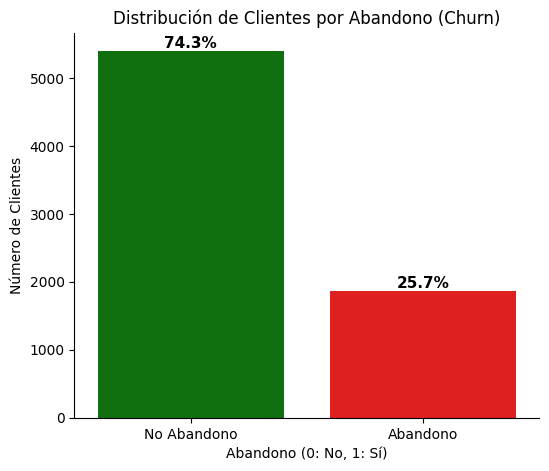


Distribuci√≥n de clientes por Abandono:
Abandono
0    5398
1    1869
Name: count, dtype: int64

Proporci√≥n de clientes por Abandono:
Abandono
0    0.74281
1    0.25719
Name: count, dtype: float64


In [172]:
# distribuci√≥n de la variable 'Abandono'
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar
# Definir colores: 0 (No Abandono) -> verde, 1 (Abandono) -> rojo
colors = {0: "green", 1: "red"}

plt.figure(figsize=(6, 5))
ax = sns.countplot(
    x="Abandono",
    data=datos_encoded,
    hue="Abandono",
    palette=colors,
    legend=False
)

plt.title("Distribuci√≥n de Clientes por Abandono (Churn)")
plt.xlabel("Abandono (0: No, 1: S√≠)")
plt.ylabel("N√∫mero de Clientes")
plt.xticks(ticks=[0, 1], labels=["No Abandono", "Abandono"])

# --- Agregar porcentajes sobre cada barra ---
total = len(datos_encoded)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f"{percentage:.1f}%",
                (p.get_x() + p.get_width() / 2., count),
                ha="center", va="bottom", fontsize=11, color="black", fontweight="bold")

# --- Quitar l√≠neas superior y derecha ---
sns.despine(top=True, right=True)

plt.show()

# Calcular y mostrar la proporci√≥n de abandono
churn_counts = datos_encoded["Abandono"].value_counts()
churn_proportions = churn_counts / total

print("\nDistribuci√≥n de clientes por Abandono:")
print(churn_counts)
print("\nProporci√≥n de clientes por Abandono:")
print(churn_proportions)

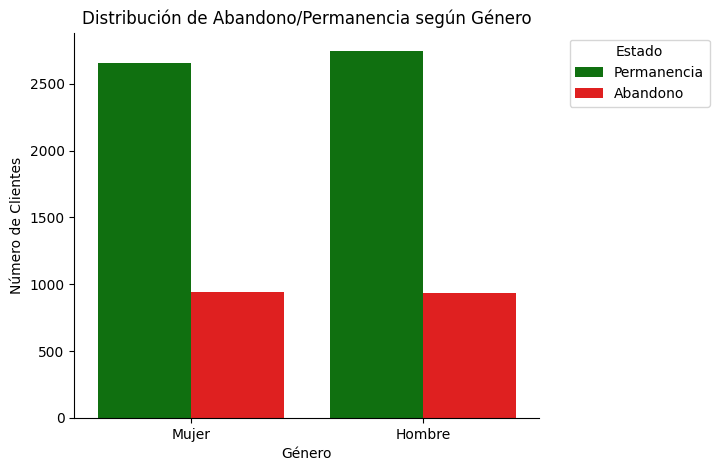

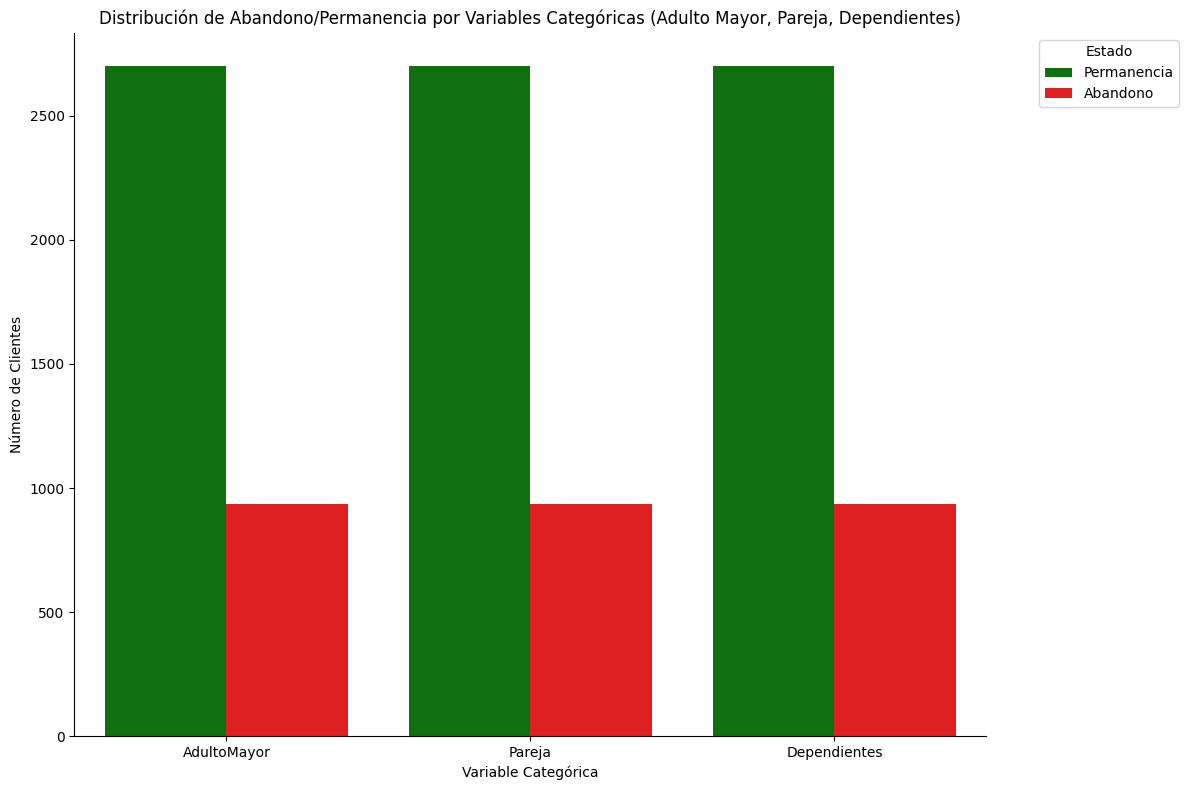

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables categ√≥ricas a graficar
categorical_vars_to_plot_group1 = ['G√©nero']
categorical_vars_to_plot_group2 = ['AdultoMayor', 'Pareja', 'Dependientes']

# Mapeo de valores num√©ricos a nombres para las etiquetas del eje X
label_mapping = {
    'G√©nero': {0: 'Mujer', 1: 'Hombre'},
    'AdultoMayor': {0: 'No Adulto Mayor', 1: 'S√≠ Adulto Mayor'},
    'Pareja': {0: 'Sin Pareja', 1: 'Con Pareja'},
    'Dependientes': {0: 'Sin Dependientes', 1: 'Con Dependientes'}
}

# Colores para Abandono (1) y Permanencia (0)
churn_colors = {'Permanencia': "green", 'Abandono': "red"} # 0: No Abandono (Permanencia), 1: S√≠ Abandono

# --- Generar el primer gr√°fico para G√©nero ---
col = 'G√©nero'
if col in datos_encoded.columns:
    plt.figure(figsize=(6, 5)) # Ajustar tama√±o para un solo gr√°fico

    # Calcular las counts para Abandono y No Abandono por categor√≠a de G√©nero
    plot_data_gender = datos_encoded.groupby([col, 'Abandono'], observed=False).size().reset_index(name='count')

    # Mapear los valores num√©ricos de la columna 'G√©nero' a sus nombres para el eje X
    if col in label_mapping:
        plot_data_gender[col] = plot_data_gender[col].map(label_mapping[col])

    # Mapear los valores num√©ricos de 'Abandono' a sus nombres para el hue y la leyenda
    plot_data_gender['Abandono_Label'] = plot_data_gender['Abandono'].map({0: 'Permanencia', 1: 'Abandono'})

    # Crear el gr√°fico de barras vertical agrupado para G√©nero
    ax = sns.barplot(x=col, y='count', hue='Abandono_Label', data=plot_data_gender, palette=churn_colors, errorbar=None)

    plt.title("Distribuci√≥n de Abandono/Permanencia seg√∫n G√©nero")
    plt.xlabel("G√©nero") # Etiqueta del eje X
    plt.ylabel("N√∫mero de Clientes")

    # Ajustar la leyenda y moverla a la derecha
    plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')


    # Eliminar bordes superiores y derechos
    sns.despine(top=True, right=True)

    # Desactivar la cuadr√≠cula expl√≠citamente
    ax.grid(False)

    plt.show()
else:
    print(f"La columna '{col}' no se encontr√≥ en el DataFrame.")


# --- Generar el segundo gr√°fico para AdultoMayor, Pareja, Dependientes ---
all_plot_data_group2 = pd.DataFrame()
for col in categorical_vars_to_plot_group2:
    if col in datos_encoded.columns:
        # Calcular las counts para Abandono y No Abandono por categor√≠a
        plot_data = datos_encoded.groupby([col, 'Abandono'], observed=False).size().reset_index(name='count')

        # Mapear los valores num√©ricos de la columna categ√≥rica a sus nombres
        if col in label_mapping:
            plot_data[col] = plot_data[col].map(label_mapping[col])

        # Mapear los valores num√©ricos de 'Abandono' a sus nombres
        plot_data['Abandono_Label'] = plot_data['Abandono'].map({0: 'Permanencia', 1: 'Abandono'})

        # A√±adir una columna para identificar la variable original
        plot_data['Variable'] = col

        all_plot_data_group2 = pd.concat([all_plot_data_group2, plot_data])

    else:
        print(f"La columna '{col}' no se encontr√≥ en el DataFrame.")

# Crear el gr√°fico de barras vertical agrupado para el segundo grupo de variables
plt.figure(figsize=(12, 8)) # Ajustar tama√±o
ax = sns.barplot(x='Variable', y='count', hue='Abandono_Label', data=all_plot_data_group2, palette=churn_colors, errorbar=None)

plt.title("Distribuci√≥n de Abandono/Permanencia por Variables Categ√≥ricas (Adulto Mayor, Pareja, Dependientes)")
plt.xlabel("Variable Categ√≥rica")
plt.ylabel("N√∫mero de Clientes")
plt.xticks(rotation=0) # Mantener etiquetas horizontales

# Mover la leyenda a la derecha fuera del gr√°fico
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar bordes superiores y derechos
sns.despine(top=True, right=True)

# Desactivar la cuadr√≠cula expl√≠citamente
ax.grid(False)

plt.tight_layout() # Ajustar layout
plt.show()

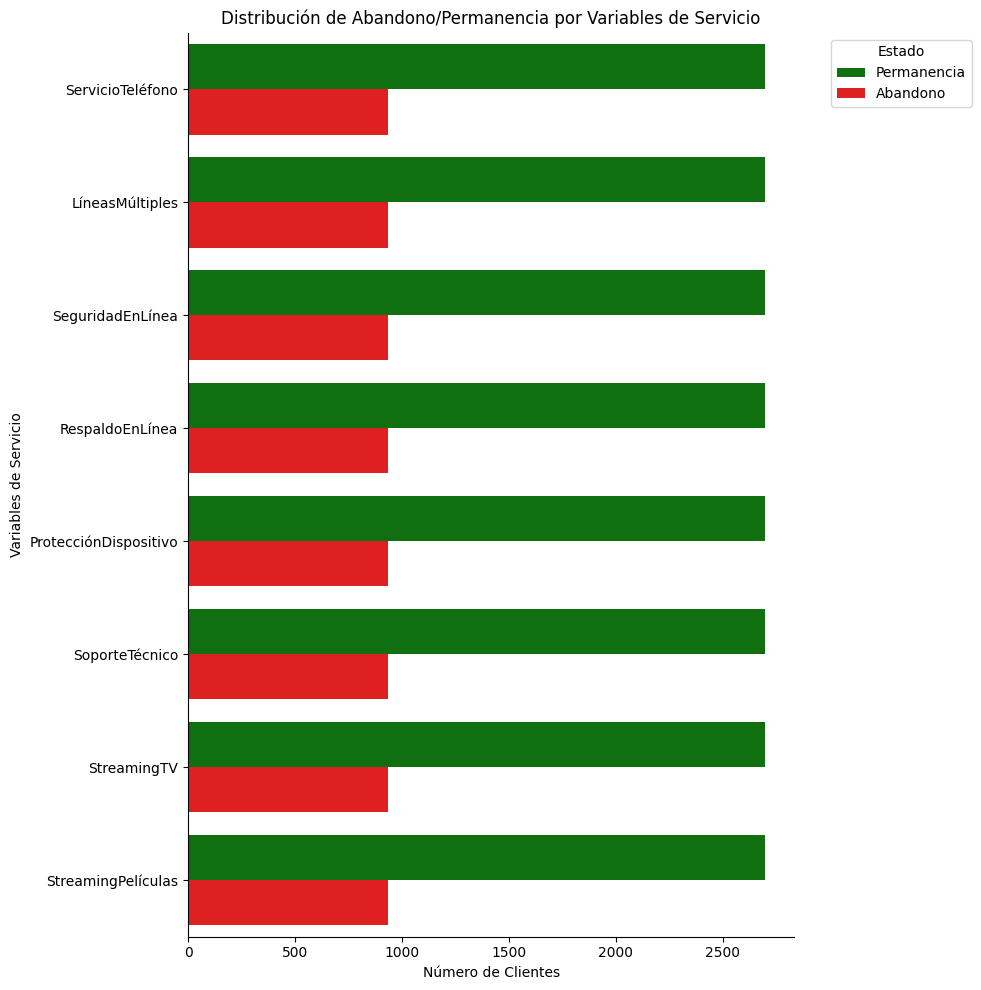

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables de servicio para graficar la distribuci√≥n de abandono
service_vars_to_plot = [
    'ServicioTel√©fono', 'L√≠neasM√∫ltiples', 'SeguridadEnL√≠nea',
    'RespaldoEnL√≠nea', 'Protecci√≥nDispositivo', 'SoporteT√©cnico',
    'StreamingTV', 'StreamingPel√≠culas'
]

# Mapeo de valores num√©ricos a nombres para el hue y la leyenda (0: Permanencia, 1: Abandono)
churn_label_mapping = {0: 'Permanencia', 1: 'Abandono'}

# Colores para Abandono y Permanencia
churn_colors = {'Permanencia': "green", 'Abandono': "red"}

# Preparar los datos para un gr√°fico agrupado horizontal
all_plot_data_service = pd.DataFrame()
for col in service_vars_to_plot:
    if col in datos_encoded.columns:
        # Calcular las counts para Abandono y No Abandono por categor√≠a de servicio
        plot_data = datos_encoded.groupby([col, 'Abandono'], observed=False).size().reset_index(name='count')

        # Mapear los valores num√©ricos de 'Abandono' a sus nombres para el hue y la leyenda
        plot_data['Abandono_Label'] = plot_data['Abandono'].map(churn_label_mapping)

        # A√±adir una columna para identificar la variable original
        plot_data['Variable'] = col

        all_plot_data_service = pd.concat([all_plot_data_service, plot_data])

    else:
        print(f"La columna '{col}' no se encontr√≥ en el DataFrame.")

# Crear el gr√°fico de barras horizontal agrupado
plt.figure(figsize=(10, 10)) # Ajustar tama√±o del gr√°fico para acomodar m√°s barras
ax = sns.barplot(x='count', y='Variable', hue='Abandono_Label', data=all_plot_data_service, palette=churn_colors, errorbar=None)

plt.title('Distribuci√≥n de Abandono/Permanencia por Variables de Servicio')
plt.xlabel('N√∫mero de Clientes')
plt.ylabel('Variables de Servicio')

# Ajustar la leyenda (moverla a la derecha)
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar bordes superiores y derechos
sns.despine(top=True, right=True)

# Desactivar la cuadr√≠cula expl√≠citamente
ax.grid(False)

plt.tight_layout() # Ajustar layout
plt.show()

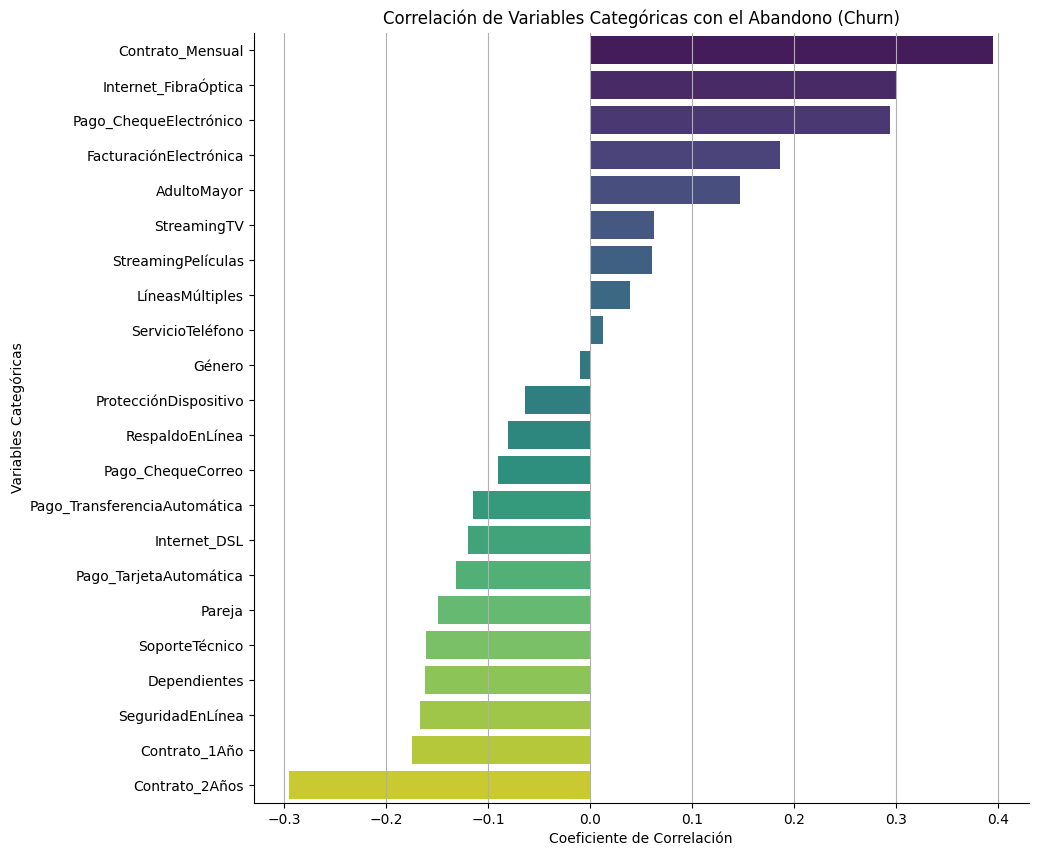

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de todas las variables categ√≥ricas (excluyendo 'Abandono')
all_categorical_vars = [
    'G√©nero', 'AdultoMayor', 'Pareja', 'Dependientes',
    'ServicioTel√©fono', 'L√≠neasM√∫ltiples', 'SeguridadEnL√≠nea',
    'RespaldoEnL√≠nea', 'Protecci√≥nDispositivo', 'SoporteT√©cnico',
    'StreamingTV', 'StreamingPel√≠culas', 'Facturaci√≥nElectr√≥nica',
    'Internet_DSL', 'Internet_Fibra√ìptica',
    'Contrato_Mensual', 'Contrato_1A√±o', 'Contrato_2A√±os',
    'Pago_TransferenciaAutom√°tica', 'Pago_TarjetaAutom√°tica',
    'Pago_ChequeElectr√≥nico', 'Pago_ChequeCorreo'
]

# Asegurarnos de que 'Abandono' sea num√©rica para el c√°lculo de correlaci√≥n
# Ya la mapeamos a 0 y 1, pero verificamos.
if datos_encoded['Abandono'].dtype.name == 'category':
     datos_encoded['Abandono'] = datos_encoded['Abandono'].astype(int)

# Calcular la correlaci√≥n solo para las variables categ√≥ricas especificadas y Abandono
# Creamos un sub-DataFrame con estas columnas m√°s Abandono
cols_to_correlate = all_categorical_vars + ['Abandono']

# Asegurarnos de que todas las columnas existan antes de seleccionarlas
cols_to_correlate = [col for col in cols_to_correlate if col in datos_encoded.columns]
correlation_df = datos_encoded[cols_to_correlate]


# Calcular la matriz de correlaci√≥n para este sub-DataFrame
# Solo calculamos la correlaci√≥n si hay m√°s de una columna (Abandono + al menos una variable)
if len(correlation_df.columns) > 1:
    correlation_matrix = correlation_df.corr()

    # Extraer la correlaci√≥n con la variable 'Abandono'
    correlation_with_churn = correlation_matrix['Abandono'].sort_values(ascending=False)

    # Excluir la correlaci√≥n de 'Abandono' consigo misma
    correlation_with_churn = correlation_with_churn.drop('Abandono', errors='ignore') # Usar errors='ignore' por si Abandono ya fue excluido

    # Generar el gr√°fico de barras horizontales
    plt.figure(figsize=(10, 10)) # Ajustar tama√±o del gr√°fico
    # Usamos la sugerencia anterior para evitar FutureWarning: asignar el eje y a hue y legend=False
    ax = sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, hue=correlation_with_churn.index, palette='viridis', legend=False)

    plt.title('Correlaci√≥n de Variables Categ√≥ricas con el Abandono (Churn)')
    plt.xlabel('Coeficiente de Correlaci√≥n')
    plt.ylabel('Variables Categ√≥ricas')
    plt.grid(axis='x') # Mantener las l√≠neas de cuadr√≠cula en el eje x para referencia
    sns.despine(top=True, right=True)
    plt.show()
else:
    print("No hay suficientes columnas categ√≥ricas para calcular la correlaci√≥n con Abandono.")

# Analisis de variable numericas

Visualizaci√≥n de la distribuci√≥n de Abandono/Permanencia con gr√°ficos de columnas apiladas:


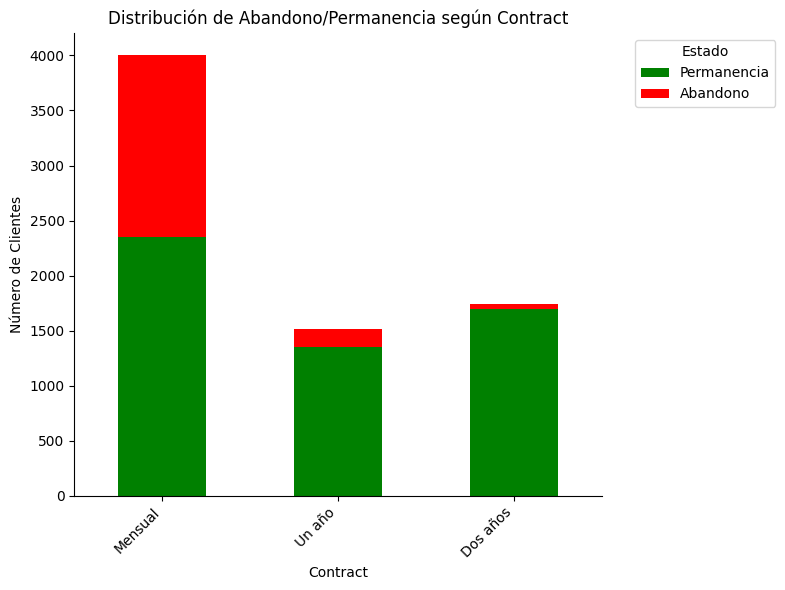

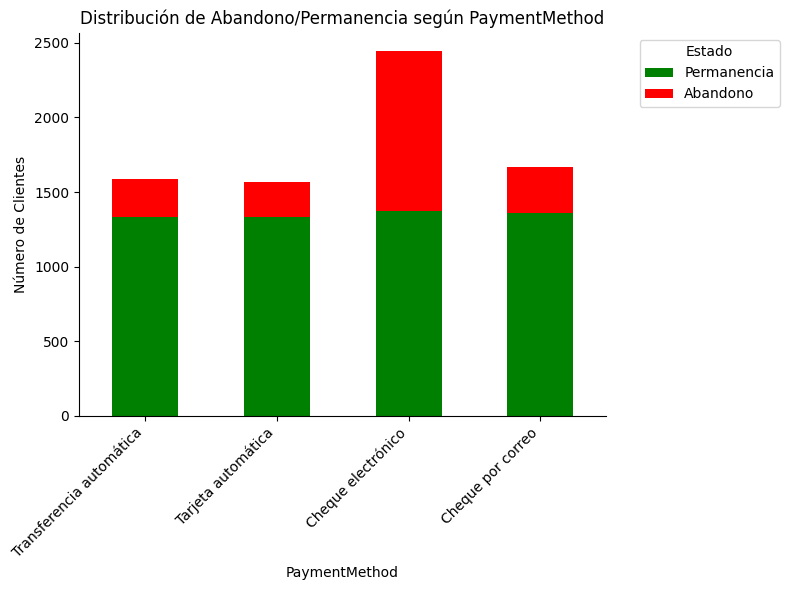

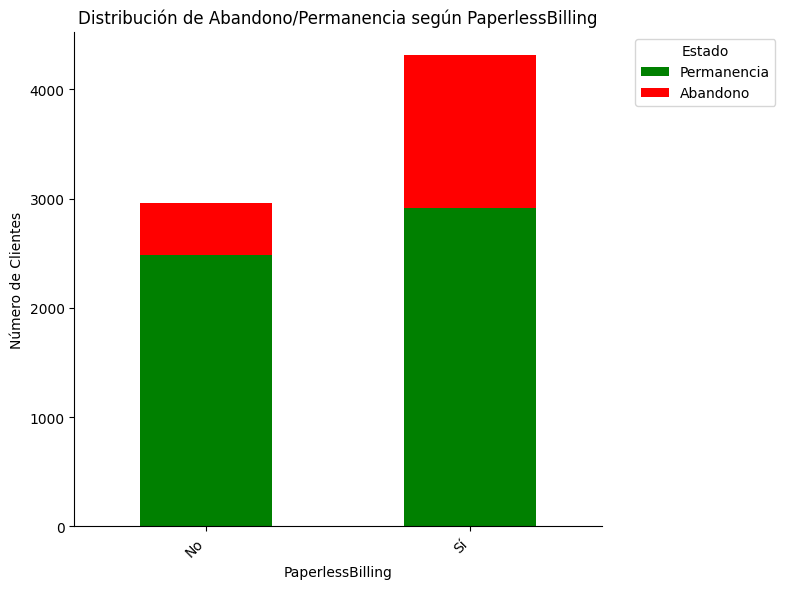

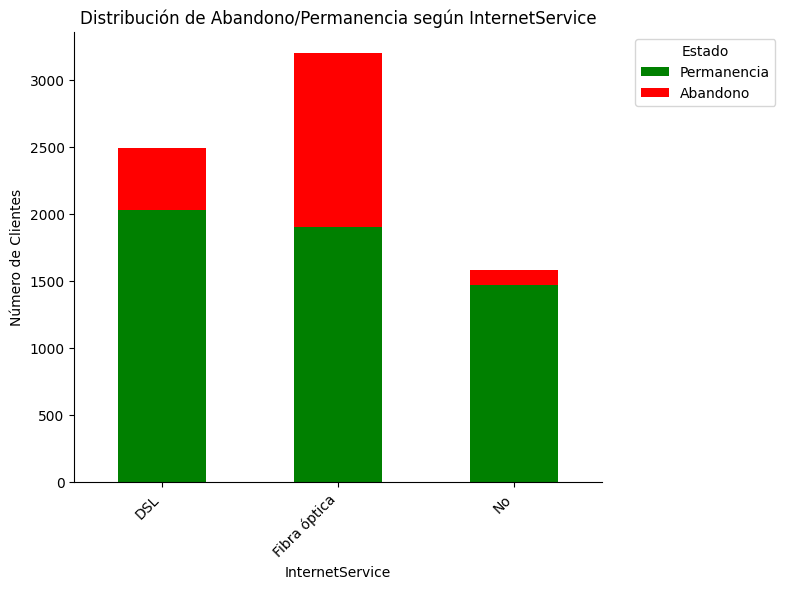

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables categ√≥ricas para graficar la distribuci√≥n de abandono con barras apiladas
categorical_vars_stacked_plot = [
    'Contract', 'PaymentMethod', 'PaperlessBilling', 'InternetService'
]

# Mapeo de valores de Abandono a nombres para el hue y la leyenda
churn_label_mapping = {'No': 'Permanencia', 'Yes': 'Abandono'}

# Colores para Abandono y Permanencia
churn_colors = {'Permanencia': "green", 'Abandono': "red"}

# Mapeo de etiquetas del eje X de ingl√©s a espa√±ol para las variables espec√≠ficas
label_translation = {
    'Contract': {
        'Month-to-month': 'Mensual',
        'One year': 'Un a√±o',
        'Two year': 'Dos a√±os'
    },
    'PaymentMethod': {
        'Electronic check': 'Cheque electr√≥nico',
        'Mailed check': 'Cheque por correo',
        'Bank transfer (automatic)': 'Transferencia autom√°tica',
        'Credit card (automatic)': 'Tarjeta autom√°tica'
    },
    'PaperlessBilling': {
        'Yes': 'S√≠',
        'No': 'No'
    },
    'InternetService': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra √≥ptica',
        'No': 'No'
    }
}


# Usaremos el DataFrame 'datos_cleaned' que a√∫n tiene las columnas categ√≥ricas originales
# Asegurarnos de que 'Abandono' en datos_cleaned sea de tipo category o object
if datos_cleaned['Churn'].dtype.name != 'category' and datos_cleaned['Churn'].dtype.name != 'object':
     datos_cleaned['Churn'] = datos_encoded['Churn'].astype('category') # Usar datos_encoded ya que Abandono ya est√° mapeado a 0/1


print("Visualizaci√≥n de la distribuci√≥n de Abandono/Permanencia con gr√°ficos de columnas apiladas:")

for col in categorical_vars_stacked_plot:
    if col in datos_cleaned.columns:
        plt.figure(figsize=(8, 6)) # Ajustar tama√±o del gr√°fico

        # Crear tabla de contingencia para el gr√°fico apilado
        # Usamos 'Churn' como √≠ndice y la variable categ√≥rica como columnas
        # Y luego transponemos para que las categor√≠as de la variable queden en el eje X
        contingency_table = pd.crosstab(datos_cleaned[col], datos_cleaned['Churn'])

        # Crear el gr√°fico de barras apiladas
        # Usamos el m√©todo plot(kind='bar', stacked=True) de pandas en la tabla de contingencia transpuesta
        ax = contingency_table.plot(kind='bar', stacked=True, color=[churn_colors['Permanencia'], churn_colors['Abandono']], ax=plt.gca())


        plt.title(f"Distribuci√≥n de Abandono/Permanencia seg√∫n {col}")
        plt.xlabel(col)
        plt.ylabel("N√∫mero de Clientes")
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X si son largas

        # Aplicar traducci√≥n a las etiquetas del eje X si existe un mapeo para esta columna
        if col in label_translation:
            # Obtener las etiquetas originales del eje X
            original_labels = [item.get_text() for item in ax.get_xticklabels()]
            # Aplicar la traducci√≥n
            translated_labels = [label_translation[col].get(label, label) for label in original_labels]
            # Establecer las nuevas etiquetas traducidas
            ax.set_xticklabels(translated_labels)


        # Ajustar la leyenda (usar las etiquetas de texto)
        plt.legend(title="Estado", labels=[churn_label_mapping['No'], churn_label_mapping['Yes']], bbox_to_anchor=(1.05, 1), loc='upper left')


        # Eliminar bordes superiores y derechos
        sns.despine(top=True, right=True)

        # Desactivar la cuadr√≠cula expl√≠citamente
        ax.grid(False)

        plt.tight_layout() # Ajustar layout
        plt.show()

    else:
        print(f"\n--- Columna '{col}' no encontrada en el DataFrame 'datos_cleaned'. ---")

Visualizaci√≥n de la distribuci√≥n de Variables Num√©ricas seg√∫n el estado de Abandono:


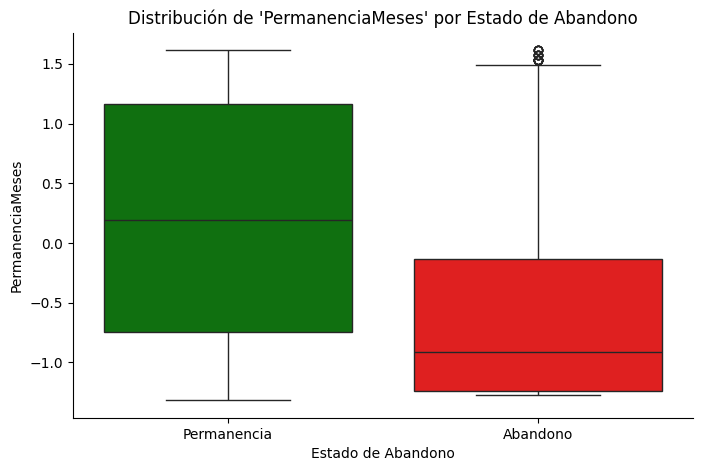

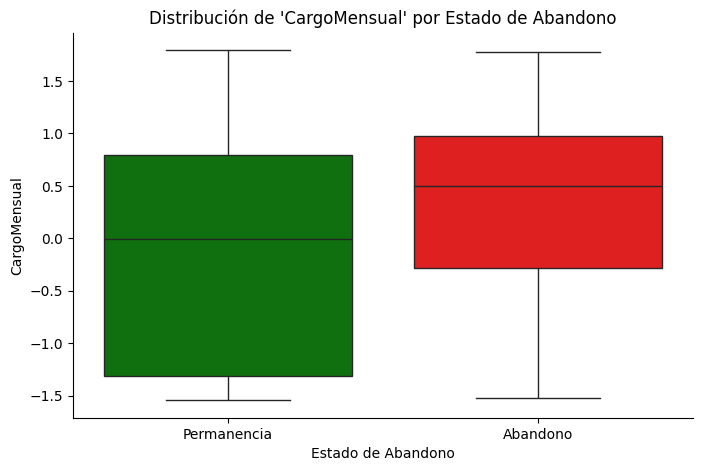

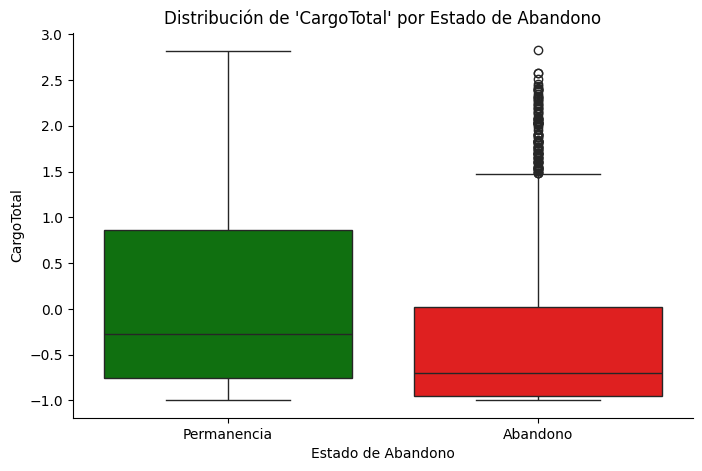

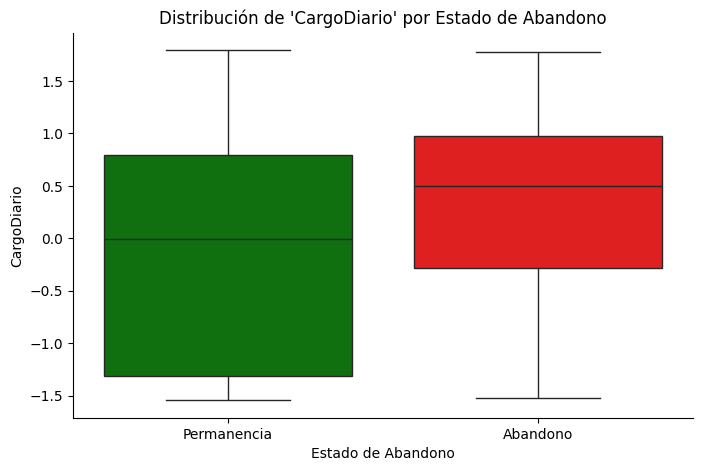

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables num√©ricas para visualizar
numeric_vars_to_plot = ['PermanenciaMeses', 'CargoMensual', 'CargoTotal', 'CargoDiario']

# Mapeo de valores num√©ricos de Abandono a nombres para el hue
churn_label_mapping = {0: 'Permanencia', 1: 'Abandono'}
# Asegurarnos de que la columna 'Abandono_Label' exista y est√© actualizada
datos_encoded['Abandono_Label'] = datos_encoded['Abandono'].map(churn_label_mapping)

print("Visualizaci√≥n de la distribuci√≥n de Variables Num√©ricas seg√∫n el estado de Abandono:")

for col in numeric_vars_to_plot:
    if col in datos_encoded.columns:
        plt.figure(figsize=(8, 5))

        # Crear box plot
        # Usamos 'Abandono_Label' para el eje x y hue, y palette con las etiquetas de texto
        sns.boxplot(x='Abandono_Label', y=col, data=datos_encoded, hue='Abandono_Label', palette={'Permanencia': "green", 'Abandono': "red"}, legend=False)

        plt.title(f"Distribuci√≥n de '{col}' por Estado de Abandono")
        plt.xlabel("Estado de Abandono")
        plt.ylabel(col)
        sns.despine(top=True, right=True)
        plt.show()

    else:
        print(f"\n--- Columna '{col}' no encontrada en el DataFrame. ---")

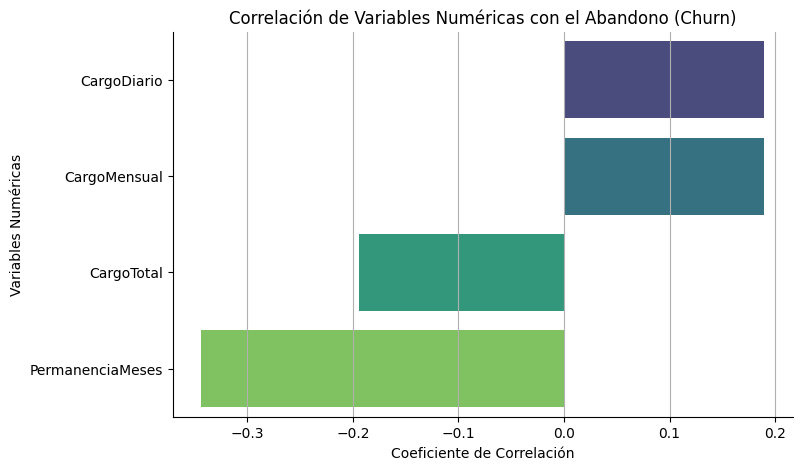

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables num√©ricas para calcular la correlaci√≥n con Abandono
numeric_vars_for_correlation = ['PermanenciaMeses', 'CargoMensual', 'CargoTotal', 'CargoDiario']

# Asegurarnos de que 'Abandono' sea num√©rica para el c√°lculo de correlaci√≥n
# Ya la mapeamos a 0 y 1 y la incluimos en numeric_df, pero verificamos.
if datos_encoded['Abandono'].dtype.name == 'category':
     datos_encoded['Abandono'] = datos_encoded['Abandono'].astype(int)

# Calcular la correlaci√≥n solo para las variables num√©ricas especificadas y Abandono
# Creamos un sub-DataFrame con estas columnas m√°s Abandono
cols_to_correlate = numeric_vars_for_correlation + ['Abandono']

# Asegurarnos de que todas las columnas existan antes de seleccionarlas
cols_to_correlate = [col for col in cols_to_correlate if col in datos_encoded.columns]
correlation_df_numeric = datos_encoded[cols_to_correlate]


# Calcular la matriz de correlaci√≥n para este sub-DataFrame
# Solo calculamos la correlaci√≥n si hay m√°s de una columna (Abandono + al menos una variable)
if len(correlation_df_numeric.columns) > 1:
    correlation_matrix_numeric = correlation_df_numeric.corr()

    # Extraer la correlaci√≥n con la variable 'Abandono'
    correlation_with_churn_numeric = correlation_matrix_numeric['Abandono'].sort_values(ascending=False)

    # Excluir la correlaci√≥n de 'Abandono' consigo misma
    correlation_with_churn_numeric = correlation_with_churn_numeric.drop('Abandono', errors='ignore') # Usar errors='ignore' por si Abandono ya fue excluido

    # Generar el gr√°fico de barras horizontales
    plt.figure(figsize=(8, 5)) # Ajustar tama√±o del gr√°fico
    # Usamos la sugerencia anterior para evitar FutureWarning: asignar el eje y a hue y legend=False
    ax = sns.barplot(x=correlation_with_churn_numeric.values, y=correlation_with_churn_numeric.index, hue=correlation_with_churn_numeric.index, palette='viridis', legend=False)

    plt.title('Correlaci√≥n de Variables Num√©ricas con el Abandono (Churn)')
    plt.xlabel('Coeficiente de Correlaci√≥n')
    plt.ylabel('Variables Num√©ricas')
    plt.grid(axis='x') # Mantener las l√≠neas de cuadr√≠cula en el eje x para referencia
    sns.despine(top=True, right=True)
    plt.show()
else:
    print("No hay suficientes columnas num√©ricas para calcular la correlaci√≥n con Abandono.")

In [176]:
print(datos_encoded.columns.tolist())

['Abandono', 'G√©nero', 'AdultoMayor', 'Pareja', 'Dependientes', 'PermanenciaMeses', 'ServicioTel√©fono', 'L√≠neasM√∫ltiples', 'SeguridadEnL√≠nea', 'RespaldoEnL√≠nea', 'Protecci√≥nDispositivo', 'SoporteT√©cnico', 'StreamingTV', 'StreamingPel√≠culas', 'Facturaci√≥nElectr√≥nica', 'CargoMensual', 'CargoTotal', 'Internet_DSL', 'Internet_Fibra√ìptica', 'Contrato_Mensual', 'Contrato_1A√±o', 'Contrato_2A√±os', 'Pago_TransferenciaAutom√°tica', 'Pago_TarjetaAutom√°tica', 'Pago_ChequeElectr√≥nico', 'Pago_ChequeCorreo', 'CargoDiario']


#üìÑInforme final

Ahora que los datos han sido limpiados y preparados, los siguientes pasos podr√≠an incluir:

1.  **Selecci√≥n de Caracter√≠sticas**: Identificar las caracter√≠sticas m√°s relevantes para predecir el abandono.
2.  **Divisi√≥n de Datos**: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
3.  **Selecci√≥n y Entrenamiento del Modelo**: Elegir y entrenar un modelo de clasificaci√≥n para predecir el abandono.
4.  **Evaluaci√≥n del Modelo**: Evaluar el rendimiento del modelo utilizando m√©tricas apropiadas.
5.  **Afinaci√≥n del Modelo**: Optimizar los hiperpar√°metros del modelo para mejorar su rendimiento.
6.  **Interpretaci√≥n del Modelo**: Comprender qu√© caracter√≠sticas son m√°s importantes para la predicci√≥n de abandono.
7.  **Informe Final**: Presentar los hallazgos y las conclusiones.

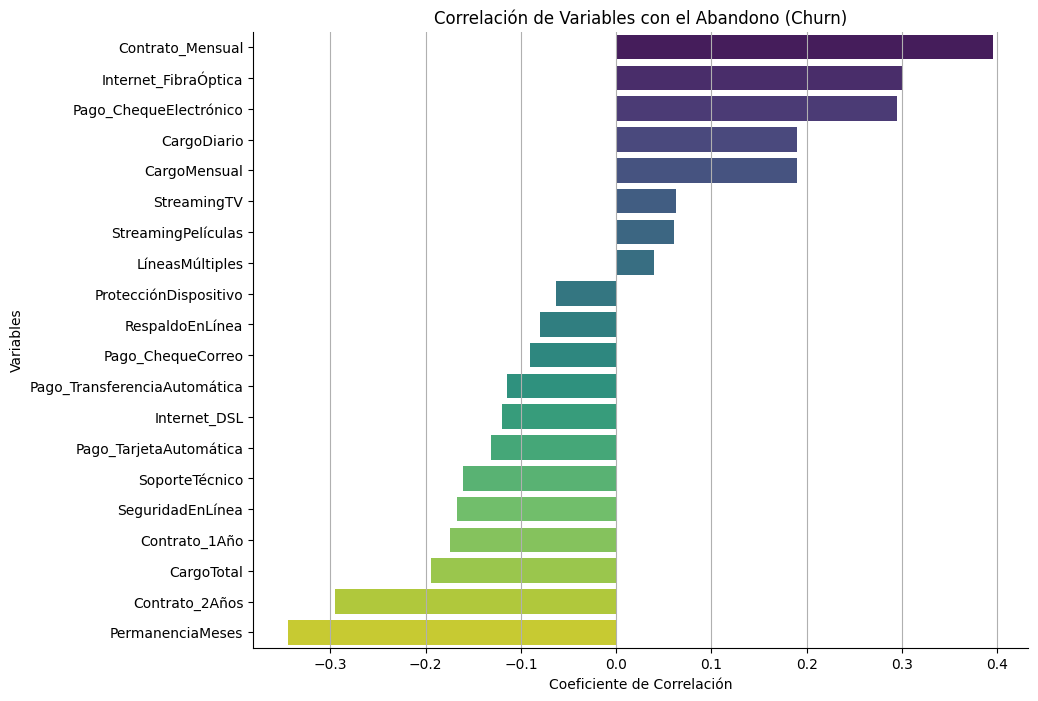

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlaci√≥n. Es importante excluir columnas no num√©ricas si las hubiera.
# Aunque ya hemos codificado la mayor√≠a, 'G√©nero', 'AdultoMayor', etc. son ahora num√©ricas (0/1).
# Aseguramos que todas las columnas a correlacionar sean num√©ricas.
# Excluimos 'customerID' si a√∫n estuviera presente (ya la eliminamos antes).
# La columna 'Abandono' ya est√° mapeada a 0 y 1, lo cual es adecuado para la correlaci√≥n.

# Seleccionar solo columnas num√©ricas para calcular la correlaci√≥n
numeric_df = datos_encoded.select_dtypes(include=['int64', 'float64'])

# Calcular la correlaci√≥n con la variable 'Abandono'
# Asegurarnos de que 'Abandono' est√© presente y sea num√©rica en numeric_df
if 'Abandono' in datos_encoded.columns:
    if datos_encoded['Abandono'].dtype.name == 'category':
         # Convertir 'Abandono' a num√©rica si a√∫n es category (aunque ya lo hicimos antes, mejor ser seguro)
         numeric_df['Abandono'] = datos_encoded['Abandono'].astype(int)
    elif datos_encoded['Abandono'].dtype in ['int64', 'float64']:
         # Si ya es num√©rica, simplemente incluirla
         numeric_df['Abandono'] = datos_encoded['Abandono']

# Recalcular la correlaci√≥n con la columna 'Abandono' en el dataframe num√©rico
if 'Abandono' in numeric_df.columns:
    correlation_with_churn = numeric_df.corr()['Abandono'].sort_values(ascending=False)

    # Excluir la correlaci√≥n de 'Abandono' consigo misma (ser√° 1)
    correlation_with_churn = correlation_with_churn.drop('Abandono')

    # Generar el gr√°fico de barras horizontales
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, hue=correlation_with_churn.index, palette='viridis', legend=False)
    plt.title('Correlaci√≥n de Variables con el Abandono (Churn)')
    plt.xlabel('Coeficiente de Correlaci√≥n')
    plt.ylabel('Variables')
    plt.grid(axis='x')
    sns.despine(top=True, right=True)
    plt.show()
else:
    print("La columna 'Abandono' no se encontr√≥ en el DataFrame num√©rico para calcular la correlaci√≥n.")

Visualizaci√≥n de la distribuci√≥n de Abandono/Permanencia con gr√°ficos de columnas apiladas:


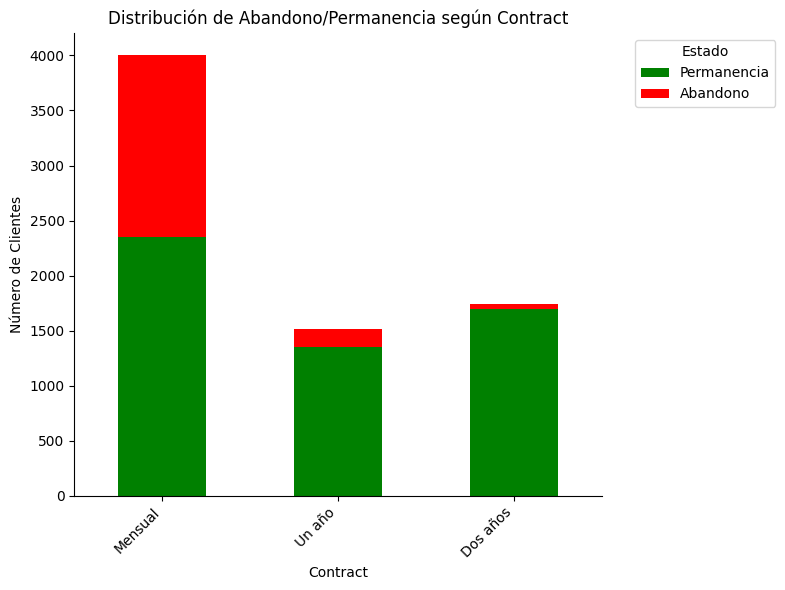

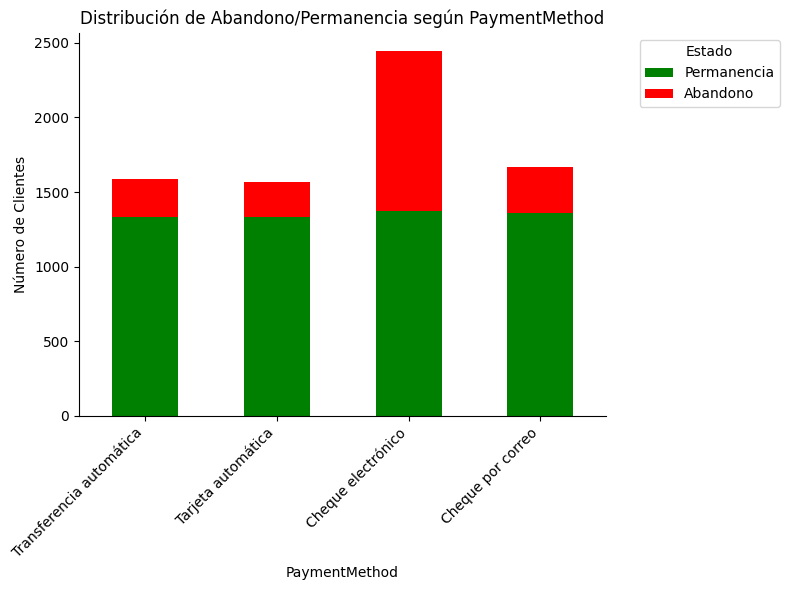

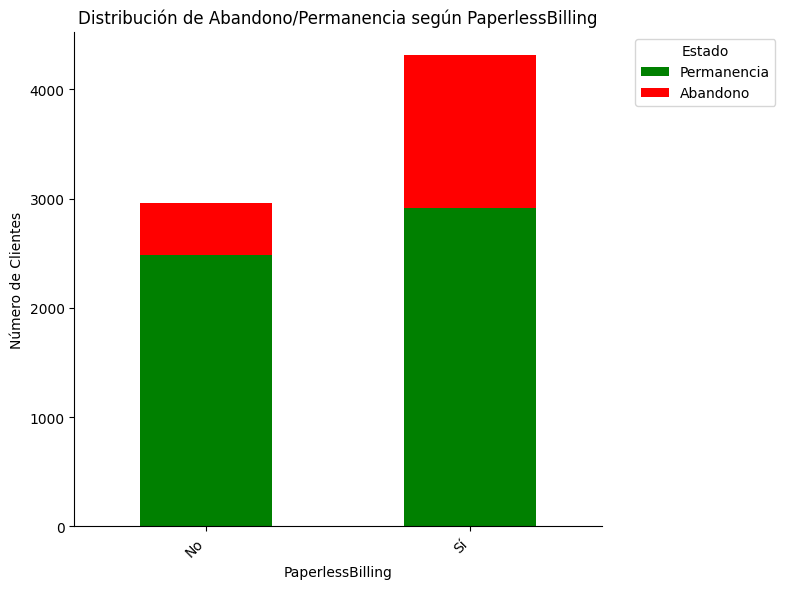

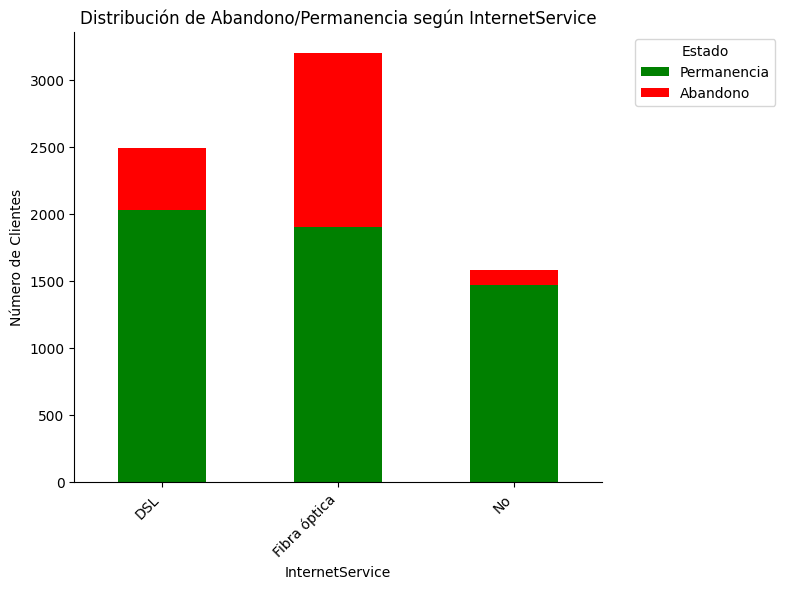

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables categ√≥ricas para graficar la distribuci√≥n de abandono con barras apiladas
categorical_vars_stacked_plot = [
    'Contract', 'PaymentMethod', 'PaperlessBilling', 'InternetService'
]

# Mapeo de valores de Abandono a nombres para el hue y la leyenda
churn_label_mapping = {'No': 'Permanencia', 'Yes': 'Abandono'}

# Colores para Abandono y Permanencia
churn_colors = {'Permanencia': "green", 'Abandono': "red"}

# Mapeo de etiquetas del eje X de ingl√©s a espa√±ol para las variables espec√≠ficas
label_translation = {
    'Contract': {
        'Month-to-month': 'Mensual',
        'One year': 'Un a√±o',
        'Two year': 'Dos a√±os'
    },
    'PaymentMethod': {
        'Electronic check': 'Cheque electr√≥nico',
        'Mailed check': 'Cheque por correo',
        'Bank transfer (automatic)': 'Transferencia autom√°tica',
        'Credit card (automatic)': 'Tarjeta autom√°tica'
    },
    'PaperlessBilling': {
        'Yes': 'S√≠',
        'No': 'No'
    },
    'InternetService': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra √≥ptica',
        'No': 'No'
    }
}


# Usaremos el DataFrame 'datos_cleaned' que a√∫n tiene las columnas categ√≥ricas originales
# Asegurarnos de que 'Abandono' en datos_cleaned sea de tipo category o object
if datos_cleaned['Churn'].dtype.name != 'category' and datos_cleaned['Churn'].dtype.name != 'object':
     datos_cleaned['Churn'] = datos_encoded['Churn'].astype('category') # Usar datos_encoded ya que Abandono ya est√° mapeado a 0/1


print("Visualizaci√≥n de la distribuci√≥n de Abandono/Permanencia con gr√°ficos de columnas apiladas:")

for col in categorical_vars_stacked_plot:
    if col in datos_cleaned.columns:
        plt.figure(figsize=(8, 6)) # Ajustar tama√±o del gr√°fico

        # Crear tabla de contingencia para el gr√°fico apilado
        # Usamos 'Churn' como √≠ndice y la variable categ√≥rica como columnas
        # Y luego transponemos para que las categor√≠as de la variable queden en el eje X
        contingency_table = pd.crosstab(datos_cleaned[col], datos_cleaned['Churn'])

        # Crear el gr√°fico de barras apiladas
        # Usamos el m√©todo plot(kind='bar', stacked=True) de pandas en la tabla de contingencia transpuesta
        ax = contingency_table.plot(kind='bar', stacked=True, color=[churn_colors['Permanencia'], churn_colors['Abandono']], ax=plt.gca())


        plt.title(f"Distribuci√≥n de Abandono/Permanencia seg√∫n {col}")
        plt.xlabel(col)
        plt.ylabel("N√∫mero de Clientes")
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X si son largas

        # Aplicar traducci√≥n a las etiquetas del eje X si existe un mapeo para esta columna
        if col in label_translation:
            # Obtener las etiquetas originales del eje X
            original_labels = [item.get_text() for item in ax.get_xticklabels()]
            # Aplicar la traducci√≥n
            translated_labels = [label_translation[col].get(label, label) for label in original_labels]
            # Establecer las nuevas etiquetas traducidas
            ax.set_xticklabels(translated_labels)


        # Ajustar la leyenda (usar las etiquetas de texto)
        plt.legend(title="Estado", labels=[churn_label_mapping['No'], churn_label_mapping['Yes']], bbox_to_anchor=(1.05, 1), loc='upper left')


        # Eliminar bordes superiores y derechos
        sns.despine(top=True, right=True)

        # Desactivar la cuadr√≠cula expl√≠citamente
        ax.grid(False)

        plt.tight_layout() # Ajustar layout
        plt.show()

    else:
        print(f"\n--- Columna '{col}' no encontrada en el DataFrame 'datos_cleaned'. ---")

In [221]:
# Guardar el DataFrame modificado como un archivo CSV
datos_encoded.to_csv('datos_telecom_modificado.csv', index=False)

# üìÑ Informe de An√°lisis de Abandono de Clientes (Churn)

## üîπ Introducci√≥n

Este ejercio se realiza como parte de la formacion Data Science de Alura Latam - Aprendiendo a hacer ETL

Se realiza an√°lisis exploratorio de datos (EDA) sobre el conjunto de datos de clientes de TelecomX con el objetivo de comprender el problema de la evasi√≥n de clientes (Churn). El abandono de clientes es un desaf√≠o cr√≠tico para las empresas de telecomunicaciones, ya que retener a los clientes existentes suele ser m√°s rentable que adquirir nuevos. Comprender los factores que influyen en la decisi√≥n de un cliente de abandonar el servicio es fundamental para desarrollar estrategias de retenci√≥n efectivas.

El an√°lisis se centra en identificar patrones y relaciones entre las caracter√≠sticas de los clientes, los servicios que utilizan y su comportamiento de abandono, utilizando m√©todos de an√°lisis estad√≠stico y visualizaciones.

## üîπ Limpieza y Tratamiento de Datos

Los datos se cargaron inicialmente desde un archivo JSON. Durante la etapa de limpieza y tratamiento, se realizaron los siguientes pasos clave:

*   **Normalizaci√≥n de Datos Anidados**: Las columnas `customer`, `phone`, `internet` y `account`, que conten√≠an estructuras JSON anidadas, se normalizaron y se expandieron en columnas separadas para facilitar el an√°lisis.
*   **Combinaci√≥n de DataFrames**: Las columnas normalizadas se combinaron con las columnas `customerID` y `Churn` originales para formar un DataFrame consolidado (`datos_normalized`).
*   **Manejo de Valores Faltantes**: Se verific√≥ la presencia de valores faltantes. Se identificaron 11 valores faltantes en la columna `CargoTotal`, los cuales fueron imputados utilizando la mediana de la columna para evitar la p√©rdida de datos importantes.
*   **Verificaci√≥n de Duplicados**: Se comprob√≥ la existencia de filas duplicadas, no encontr√°ndose ninguna.
*   **Verificaci√≥n de Inconsistencias Categ√≥ricas**: Se revisaron los valores √∫nicos en las columnas categ√≥ricas para identificar posibles inconsistencias. Se mapearon valores como 'No phone service' y 'No internet service' a 0 junto con 'No', y 'Yes' a 1 para una codificaci√≥n binaria consistente.
*   **Conversi√≥n de Tipos de Datos**: Las columnas de cargos (`Charges_Monthly` y `Charges_Total`) se convirtieron a tipo num√©rico (`float64`), manejando posibles errores. Las columnas categ√≥ricas se convirtieron al tipo `category`.
*   **Codificaci√≥n de Variables Categ√≥ricas**: Se aplic√≥ one-hot encoding a las columnas 'InternetService', 'Contract' y 'PaymentMethod' para convertirlas en variables num√©ricas binarias. Las columnas categ√≥ricas binarias restantes (mapeadas a 0 y 1) se mantuvieron como tipo `int64` o `category` seg√∫n la etapa del an√°lisis lo requiri√≥, asegurando la correcta interpretaci√≥n para visualizaciones y correlaciones. La columna objetivo 'Abandono' tambi√©n se mape√≥ a 0 (No) y 1 (S√≠) para an√°lisis cuantitativos.
*   **Creaci√≥n de Nueva Caracter√≠stica**: Se cre√≥ la columna `CargoDiario` dividiendo `CargoMensual` por 30.
*   **Normalizaci√≥n de Variables Num√©ricas**: Las variables num√©ricas clave (`PermanenciaMeses`, `CargoMensual`, `CargoTotal`, `CargoDiario`) se normalizaron utilizando `StandardScaler` para escalar los datos a una media de 0 y desviaci√≥n est√°ndar de 1, lo cual es √∫til para ciertos an√°lisis y modelos.
*   **Eliminaci√≥n de Columnas No Significativas**: Se eliminaron columnas como `customerID` (identificador √∫nico no √∫til para el modelado general) y `InternetService_No` (redundante despu√©s del one-hot encoding de InternetService).

El resultado de esta etapa es un DataFrame (`datos_encoded`) limpio, preprocesado y listo para el an√°lisis exploratorio.

## üîπ An√°lisis Exploratorio de Datos

Se realizaron varios an√°lisis visuales y estad√≠sticos para explorar las caracter√≠sticas de los clientes y su relaci√≥n con el abandono:

*   **Distribuci√≥n General del Abandono**: Se visualiz√≥ la proporci√≥n total de clientes que abandonaron (aproximadamente **25.7%**) frente a los que permanecieron (aproximadamente **74.3%**), mostrando un desbalance en la variable objetivo.
*   **An√°lisis de Variables Categ√≥ricas y Abandono**:
    *   Se generaron gr√°ficos de barras (agrupadas y apiladas) mostrando la distribuci√≥n de abandono y permanencia para diversas variables categ√≥ricas como G√©nero, AdultoMayor, Pareja, Dependientes, Variables de Servicio (ServicioTel√©fono, L√≠neasM√∫ltiples, SeguridadEnL√≠nea, etc.), Tipo de Contrato, M√©todo de Pago, Facturaci√≥n Electr√≥nica y Tipo de Servicio de Internet.
    *   Estos gr√°ficos revelaron patrones interesantes:
        *   Los clientes con **contratos mes a mes** tienen una tasa de abandono significativamente mayor en comparaci√≥n con aquellos con contratos de uno o dos a√±os.
        *   Los clientes que utilizan **Cheque electr√≥nico** como m√©todo de pago muestran una mayor proporci√≥n de abandono.
        *   Los clientes con **Facturaci√≥n Electr√≥nica** tambi√©n parecen tener una mayor tasa de abandono.
        *   Los clientes con **servicio de Fibra √ìptica** presentan una tasa de abandono considerablemente m√°s alta que los que tienen DSL o no tienen servicio de internet.
        *   Variables como **SeguridadEnL√≠nea**, **RespaldoEnL√≠nea**, **Protecci√≥nDispositivo** y **SoporteT√©cnico** muestran que los clientes que *no* tienen estos servicios tienden a abandonar m√°s.
        *   Variables como **G√©nero** no mostraron diferencias visuales marcadas en la distribuci√≥n del abandono.
*   **Correlaci√≥n de Variables Categ√≥ricas con Abandono**: Se calcul√≥ y visualiz√≥ la correlaci√≥n de Pearson entre las variables categ√≥ricas codificadas (0/1) y la variable Abandono (0/1). Esto confirm√≥ visualmente las asociaciones observadas en los gr√°ficos de distribuci√≥n:
    *   Variables como `Contrato_Mensual`, `Internet_Fibra√ìptica` y `Pago_ChequeElectr√≥nico` mostraron correlaciones positivas relativamente fuertes con el abandono.
    *   Variables como `Contrato_2A√±os`, `PermanenciaMeses` (aunque num√©rica, su correlaci√≥n se visualiz√≥ junto a categ√≥ricas codificadas en un gr√°fico anterior) y `Dependientes` mostraron correlaciones negativas.
*   **An√°lisis de Variables Num√©ricas y Abandono**:
    *   Se generaron box plots para visualizar la distribuci√≥n de 'PermanenciaMeses', 'CargoMensual', 'CargoTotal' y 'CargoDiario' para los grupos de clientes que abandonaron y los que no.
    *   Estos gr√°ficos mostraron que los clientes que abandonan tienden a tener:
        *   Menor **Permanencia en meses**.
        *   Mayor **CargoMensual** (en promedio).
        *   Menor **CargoTotal** (lo cual es coherente con una menor permanencia).
    *   Se calcul√≥ y visualiz√≥ la correlaci√≥n de Pearson entre estas variables num√©ricas y el abandono, confirmando que `PermanenciaMeses` y `CargoTotal` tienen correlaciones negativas notables, mientras que `CargoMensual` y `CargoDiario` tienen correlaciones positivas m√°s d√©biles.
*   **Pruebas Estad√≠sticas de Asociaci√≥n**: Se realizaron pruebas de Chi-cuadrado para algunas variables categ√≥ricas ('G√©nero', 'AdultoMayor', 'Pareja', 'Dependientes') y la variable Abandono. Los resultados (valores p muy bajos para 'AdultoMayor', 'Pareja' y 'Dependientes') confirmaron que existe una asociaci√≥n estad√≠sticamente significativa entre estas variables y el abandono, mientras que para 'G√©nero' no se encontr√≥ una asociaci√≥n significativa.

## üîπ Conclusiones e Insights

Basado en el an√°lisis exploratorio, podemos extraer los siguientes insights clave sobre los factores que influyen en el abandono de clientes:

*   **Contrato**: Los clientes con contratos mes a mes son significativamente m√°s propensos a abandonar que aquellos con contratos a largo plazo (uno o dos a√±os). La duraci√≥n del contrato es un fuerte predictor de abandono.
*   **Servicio de Internet**: Los clientes con servicio de Fibra √ìptica tienen una tasa de abandono notablemente mayor que otros. Esto podr√≠a indicar problemas con la calidad del servicio de fibra o expectativas no cumplidas.
*   **Servicios Adicionales**: La falta de servicios de seguridad en l√≠nea, respaldo en l√≠nea, protecci√≥n de dispositivo y soporte t√©cnico est√° asociada con un mayor abandono. Los clientes que utilizan estos servicios adicionales tienden a permanecer.
*   **M√©todo de Pago**: El uso de Cheque electr√≥nico se relaciona con una mayor tasa de abandono, mientras que los m√©todos de pago autom√°ticos (transferencia bancaria, tarjeta de cr√©dito) se asocian con una menor tasa de abandono.
*   **Facturaci√≥n Electr√≥nica**: Los clientes que optan por la facturaci√≥n electr√≥nica parecen tener una mayor propensi√≥n al abandono.
*   **Permanencia y Cargos**: Los clientes que abandonan suelen ser clientes m√°s nuevos (menor permanencia) y, por lo tanto, tienen un Cargo Total m√°s bajo. Sin embargo, sus cargos mensuales tienden a ser m√°s altos que los de los clientes a largo plazo que permanecen. Esto sugiere que los clientes con altos cargos mensuales y poca permanencia son de alto riesgo.
*   **Demograf√≠a**: Ser un adulto mayor, tener pareja o dependientes parece estar asociado con una menor propensi√≥n al abandono (aunque la asociaci√≥n con AdultoMayor y Pareja es m√°s fuerte que con Dependientes seg√∫n las pruebas de Chi-cuadrado). El g√©nero no mostr√≥ una asociaci√≥n significativa con el abandono.

En resumen, los clientes de alto riesgo de abandono tienden a ser aquellos con contratos mes a mes, servicio de Fibra √ìptica, que no utilizan servicios adicionales de seguridad/soporte, pagan con cheque electr√≥nico, usan facturaci√≥n electr√≥nica, tienen poca antig√ºedad y cargos mensuales altos.

## üîπ Recomendaciones

Basado en los hallazgos del an√°lisis, se sugieren las siguientes recomendaciones estrat√©gicas para reducir la evasi√≥n de clientes:

1.  **Incentivar Contratos a Largo Plazo**: Ofrecer descuentos o beneficios atractivos para que los clientes de mes a mes cambien a contratos de uno o dos a√±os.
2.  **Mejorar la Experiencia del Cliente de Fibra √ìptica**: Investigar las causas del alto abandono entre los usuarios de fibra √≥ptica (problemas t√©cnicos, calidad del servicio, expectativas vs. realidad) y tomar medidas correctivas. Considerar programas de retenci√≥n espec√≠ficos para este segmento.
3.  **Promocionar Servicios de Valor A√±adido**: Educar a los clientes sobre los beneficios de la seguridad en l√≠nea, respaldo, protecci√≥n de dispositivo y soporte t√©cnico. Ofrecer paquetes promocionales o pruebas gratuitas para fomentar su adopci√≥n, especialmente para clientes de alto riesgo.
4.  **Optimizar M√©todos de Pago**: Incentivar el uso de m√©todos de pago autom√°ticos (transferencia bancaria, tarjeta de cr√©dito) a trav√©s de peque√±os descuentos o facilidad de configuraci√≥n, y quiz√°s investigar por qu√© el pago con cheque electr√≥nico se asocia a mayor abandono.
5.  **Revisar la Estrategia de Facturaci√≥n Electr√≥nica**: Analizar si la facturaci√≥n electr√≥nica en s√≠ misma es un factor o si est√° correlacionada con otros factores de abandono. Si es un factor directo, revisar el proceso o comunicaci√≥n asociada.
6.  **Programas de Retenci√≥n Temprana**: Implementar programas de contacto y ofertas especiales para clientes con baja antig√ºedad (poca permanencia) y cargos mensuales altos, ya que son un segmento de alto riesgo identificado.
7.  **Segmentaci√≥n de Clientes**: Utilizar estos hallazgos para segmentar a los clientes en grupos de alto y bajo riesgo de abandono y dirigir las campa√±as de retenci√≥n de manera m√°s efectiva.
8.  **Monitoreo Continuo**: Establecer un sistema de monitoreo continuo de los indicadores clave identificados (tipo de contrato, servicio de internet, uso de servicios adicionales, m√©todo de pago, permanencia, cargos) para detectar clientes en riesgo de abandono de manera proactiva.

Este an√°lisis exploratorio proporciona una base s√≥lida para comprender el abandono de clientes en TelecomX. Los siguientes pasos podr√≠an incluir la construcci√≥n de un modelo predictivo de churn (aunque el usuario solicit√≥ no usar ML en esta etapa, es una aplicaci√≥n com√∫n de este an√°lisis) para identificar clientes individuales en riesgo con mayor precisi√≥n y medir la efectividad de las estrategias de retenci√≥n implementadas.

In [220]:
# Guardar el DataFrame modificado como un archivo CSV
datos_encoded.to_csv('datos_telecom_modificado.csv', index=False)